In [10]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import json
import os
import os.path as osp
import numpy as np
from spinup.utils.plot import get_datasets, get_all_datasets, plot_data

In [11]:
datasets, configs = get_all_datasets(['/Users/ppiech/openaigym/spindata/bipedal_discounts/'])

# Show a sample of the data
pd.concat(datasets, ignore_index=True)

Plotting from...

/Users/ppiech/openaigym/spindata/bipedal_discounts/



,Epoch,AverageEpRet,StdEpRet,EpLen,GoalPathLen,StabilityReward,StabilityActionError,StabilityGoalError,ForwardPreictionError,GoalDiscount,...,ActionsClipFrac,ActionsStopIter,LossActionInverse,DeltaLossActionInverse,LossGoalInverse,DeltaLossGoalInverse,Unit,Condition1,Condition2,Performance
0,0,-109.130550,2.419442,56.500000,1.016692,0.375788,0.479391,0.728656,0.0,0.469259,...,0.253,79.0,0.441586,-0.334794,0.063906,-5.111264e-02,0,discounts_bipedalwalker-v2_goa0-1,discounts_bipedalwalker-v2_goa0-1-13,-109.130550
1,1,-114.688286,8.854539,153.166670,1.012115,0.335590,0.381102,0.728062,0.0,0.455954,...,0.273,79.0,0.381563,-0.056199,0.039805,-2.567329e-02,0,discounts_bipedalwalker-v2_goa0-1,discounts_bipedalwalker-v2_goa0-1-13,-114.688286
2,2,-111.741520,1.867294,138.500000,1.019211,0.346734,0.263131,0.730281,0.0,0.473278,...,0.232,65.0,0.354092,-0.032887,0.031133,-7.907208e-03,0,discounts_bipedalwalker-v2_goa0-1,discounts_bipedalwalker-v2_goa0-1-13,-111.741520
3,3,-117.167560,14.341464,172.800000,1.016178,0.358920,0.528694,0.738750,0.0,0.476384,...,0.300,79.0,0.329699,-0.026115,0.035005,-7.338822e-07,0,discounts_bipedalwalker-v2_goa0-1,discounts_bipedalwalker-v2_goa0-1-13,-117.167560
4,4,-108.520930,2.615818,65.555560,1.011117,0.367712,0.383899,0.707750,0.0,0.481690,...,0.336,79.0,0.307198,-0.025115,0.025802,-3.653638e-03,0,discounts_bipedalwalker-v2_goa0-1,discounts_bipedalwalker-v2_goa0-1-13,-108.520930
5,5,-113.586830,2.514978,161.333330,1.023315,0.354965,0.527257,0.695406,0.0,0.498846,...,0.348,79.0,0.271358,-0.031700,0.024991,-2.203153e-03,0,discounts_bipedalwalker-v2_goa0-1,discounts_bipedalwalker-v2_goa0-1-13,-113.586830
6,6,-109.926285,4.231206,74.222220,1.019280,0.376246,0.158411,0.655406,0.0,0.469288,...,0.222,5.0,0.262595,-0.018087,0.023120,-1.399055e-03,0,discounts_bipedalwalker-v2_goa0-1,discounts_bipedalwalker-v2_goa0-1-13,-109.926285
7,7,-57.948340,0.000000,1000.000000,1.018173,0.351316,0.241958,0.684250,0.0,0.475514,...,0.374,79.0,0.232381,-0.030022,0.020723,-2.039537e-03,0,discounts_bipedalwalker-v2_goa0-1,discounts_bipedalwalker-v2_goa0-1-13,-57.948340
8,8,-58.880383,0.000000,1000.000000,1.015121,0.352041,0.931553,0.696000,0.0,0.460413,...,0.184,28.0,0.230355,-0.022335,0.020714,-7.598419e-04,0,discounts_bipedalwalker-v2_goa0-1,discounts_bipedalwalker-v2_goa0-1-13,-58.880383
9,9,-109.416770,5.105190,78.857140,1.014156,0.364617,0.178804,0.678625,0.0,0.497600,...,0.427,79.0,0.242336,-0.003822,0.021094,1.100469e-04,0,discounts_bipedalwalker-v2_goa0-1,discounts_bipedalwalker-v2_goa0-1-13,-109.416770


In [13]:
# Show table of parameters used in the experiment, used as guide to graph legends

def config_values(config, paths):
    values = []
    for path in paths:
        value = config
        for name in path.split(':'):
            value = value[name]
        values.append(value)
    return values

columns = ['exp_name', 
           'steps_per_epoch',
#           'use_reward_discount',
           'goal_octaves', 
#           'goal_discount_rate', 
#           'inverse_buffer_size',
#           'no_step_reward', 
           'no_path_len_reward', 
#            'ac_kwargs:hidden_sizes', 
#            'ac_kwargs:activation', 
#            'inverse_kwargs:hidden_sizes', 
#            'inverse_kwargs:activation', 
#            'inverse_kwargs:goals_output_activation'
          ]

data = list(map(lambda config: config_values(config, columns), configs))
df = pd.DataFrame(data=data, columns=columns)
df.drop_duplicates()

,exp_name,steps_per_epoch,goal_octaves,no_path_len_reward
0,discounts_bipedalwalker-v2_goa0-1,1000,6,True
2,discounts_bipedalwalker-v2_goa0-0,1000,6,True


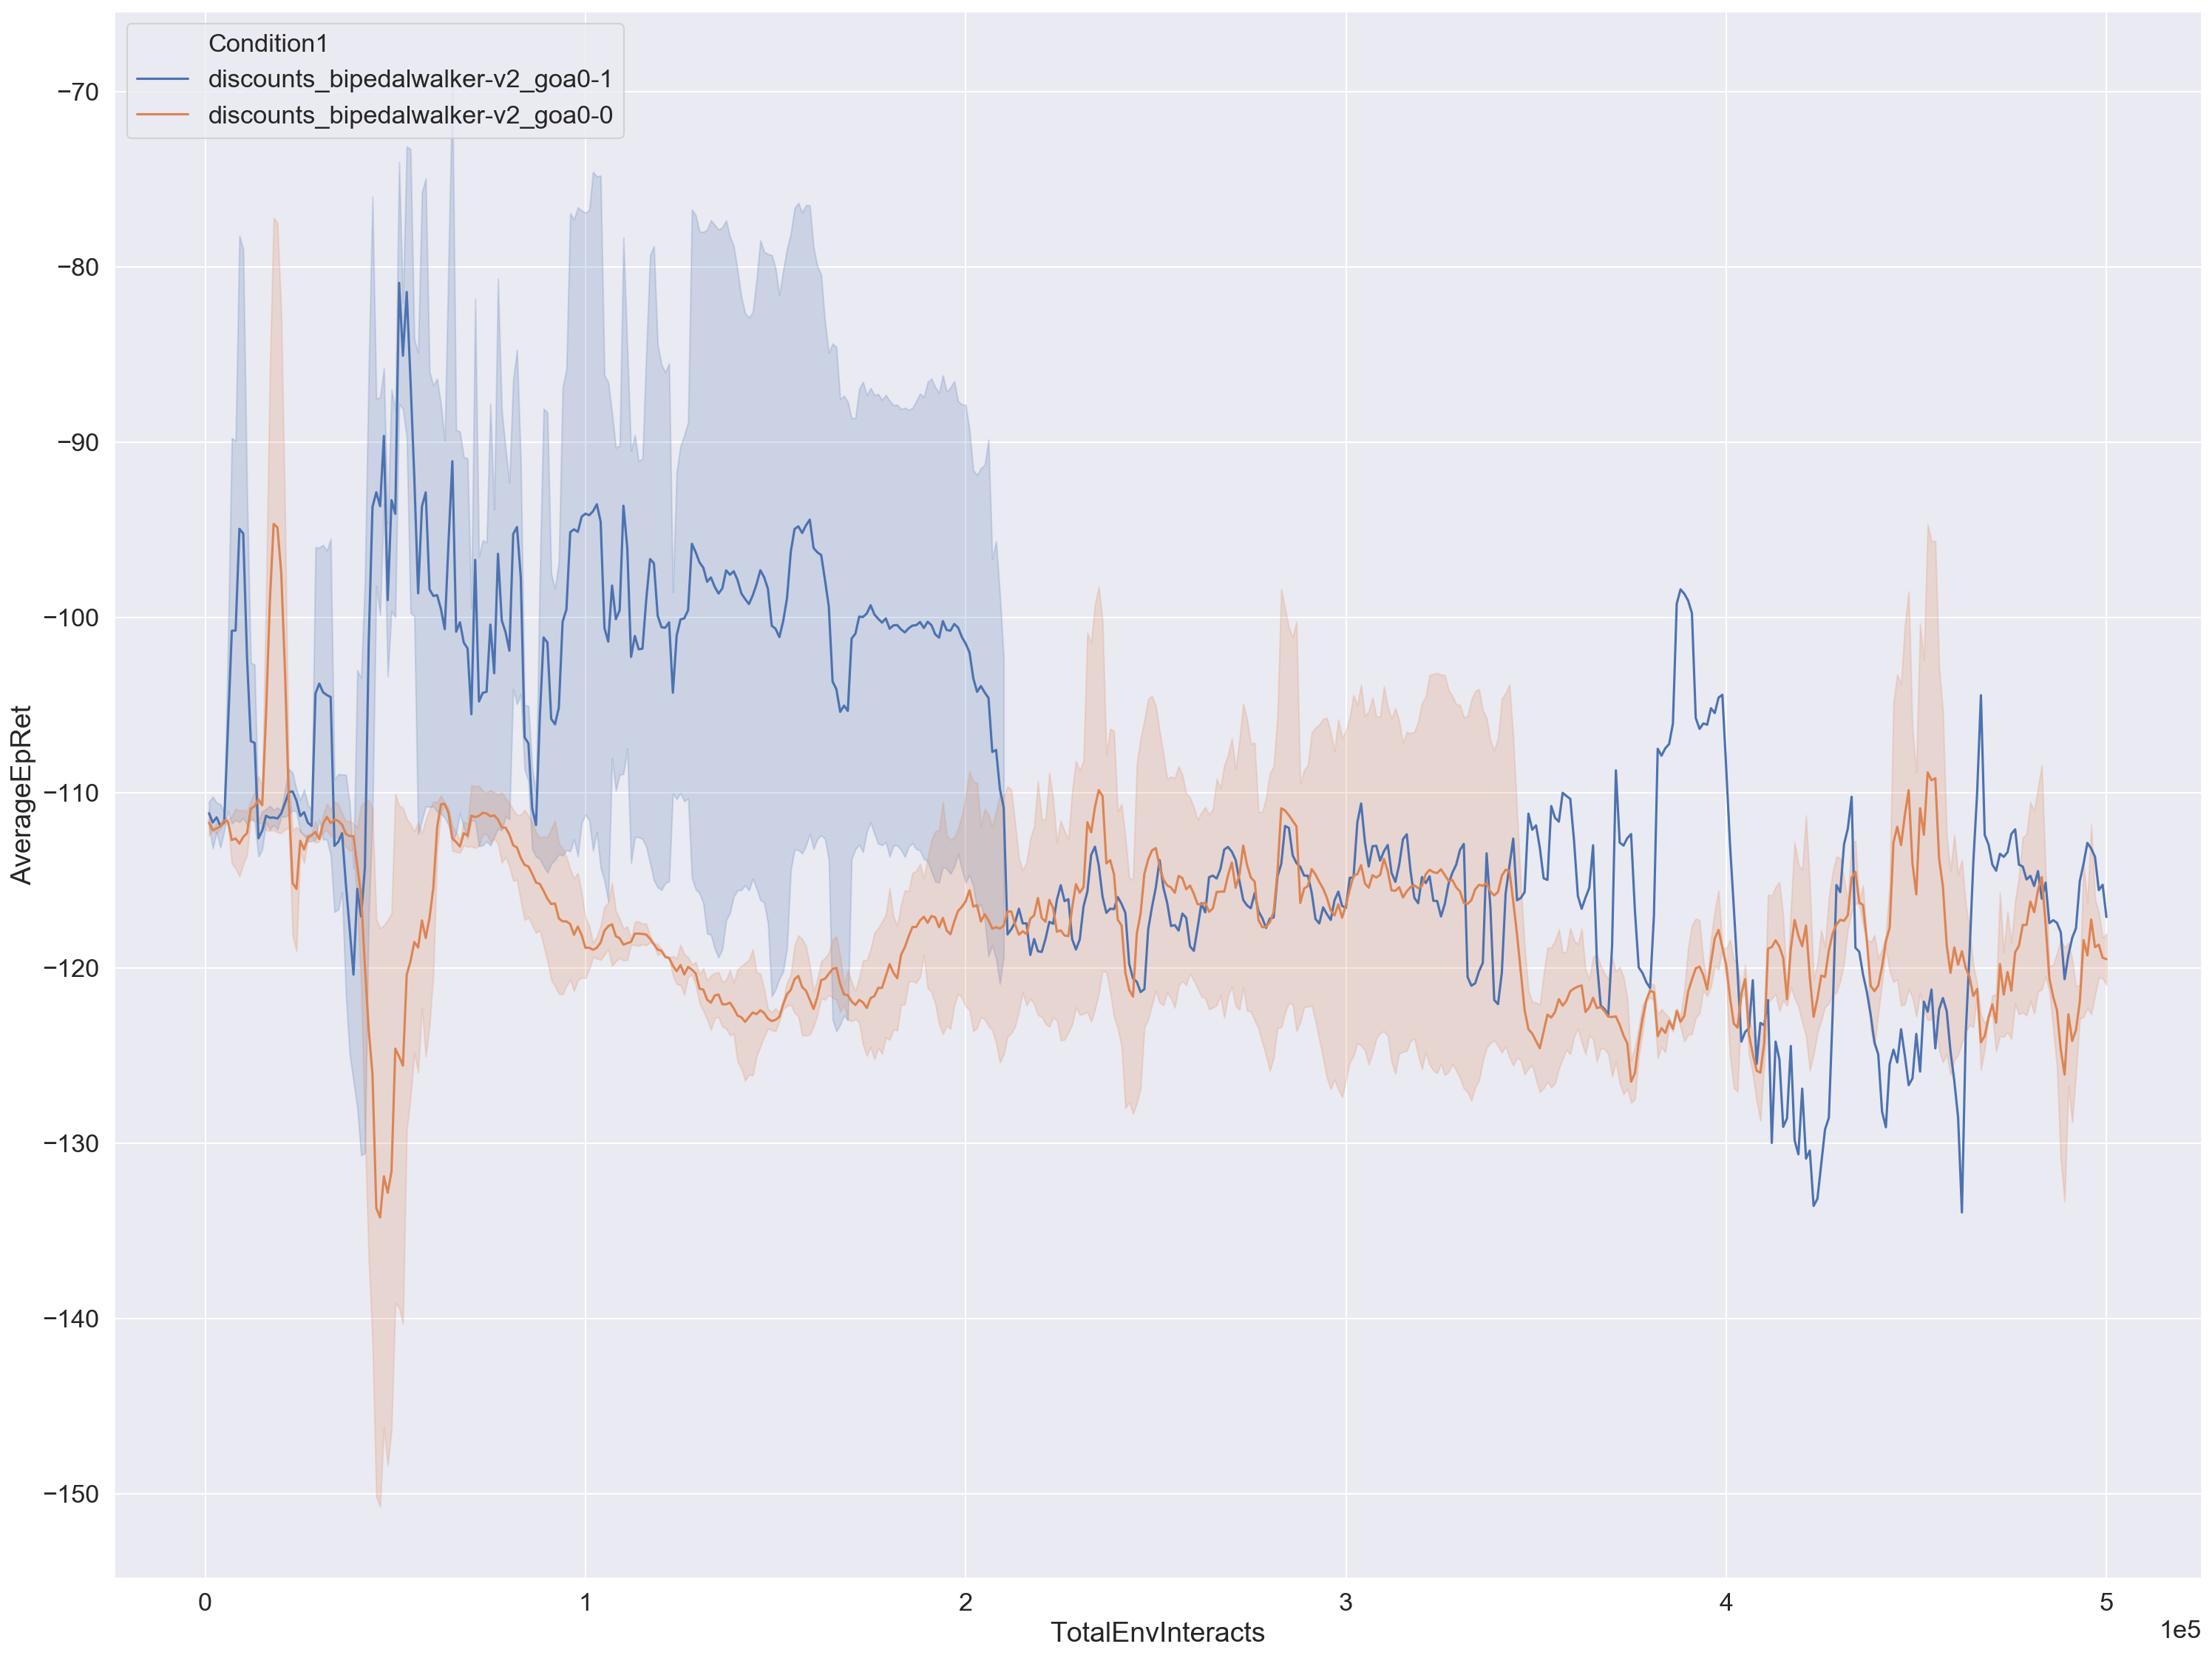

In [14]:
plt.figure(figsize=(20, 15), dpi=150)

# To show individual runs, add arguments: units='Condition2, estimator=None
# To compare runs with different epoch lengts, use:xaxis='TotalEnvInteracts'

plot_data(datasets, smooth=5, xaxis='TotalEnvInteracts')
plt.show()

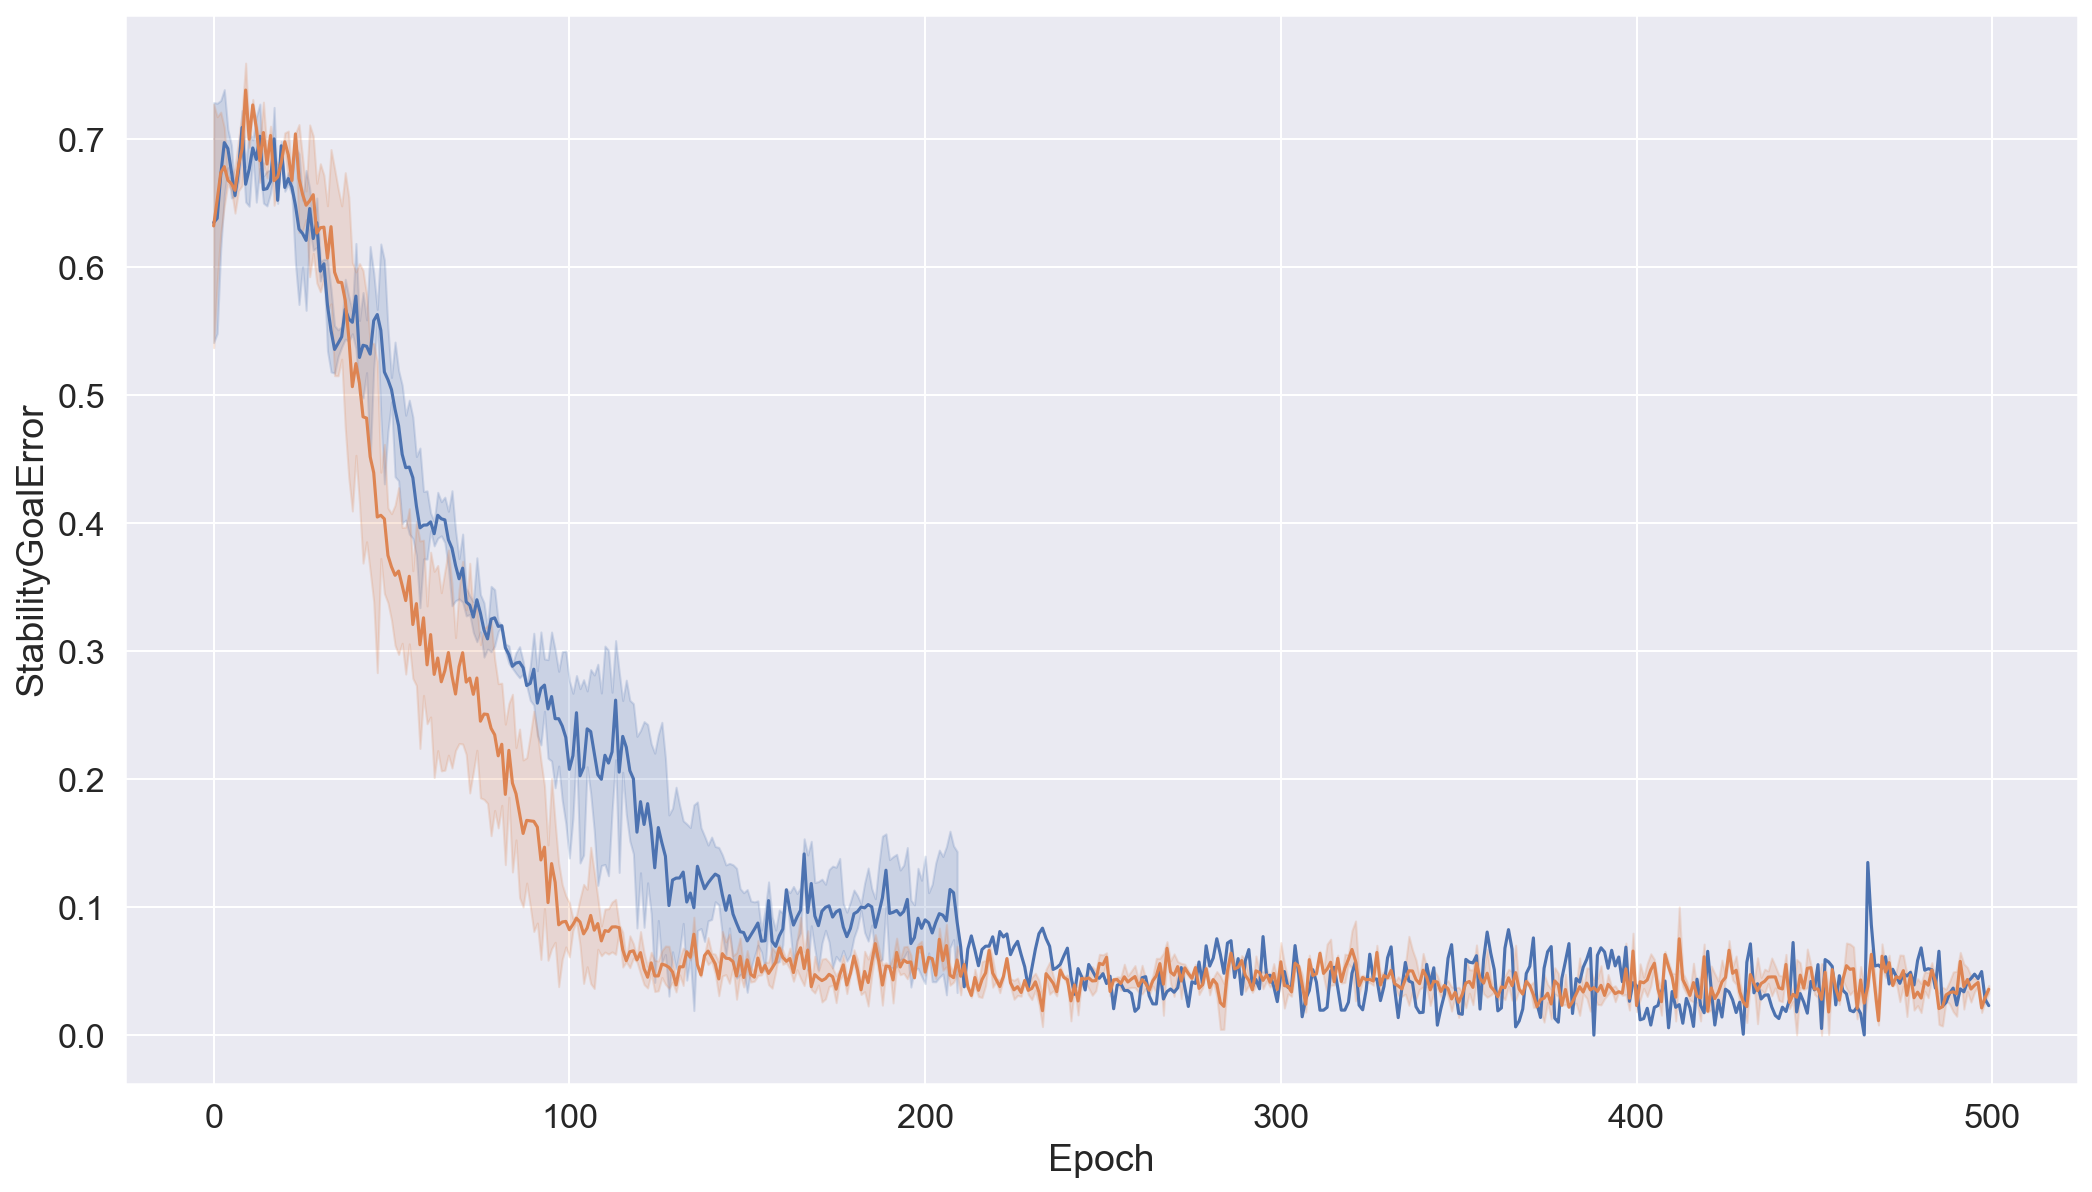

In [15]:
plt.figure(figsize=(14, 8), dpi=150)
plot_data(datasets, value='StabilityGoalError', smooth=1, show_legend=False, estimator='mean')
plt.show()

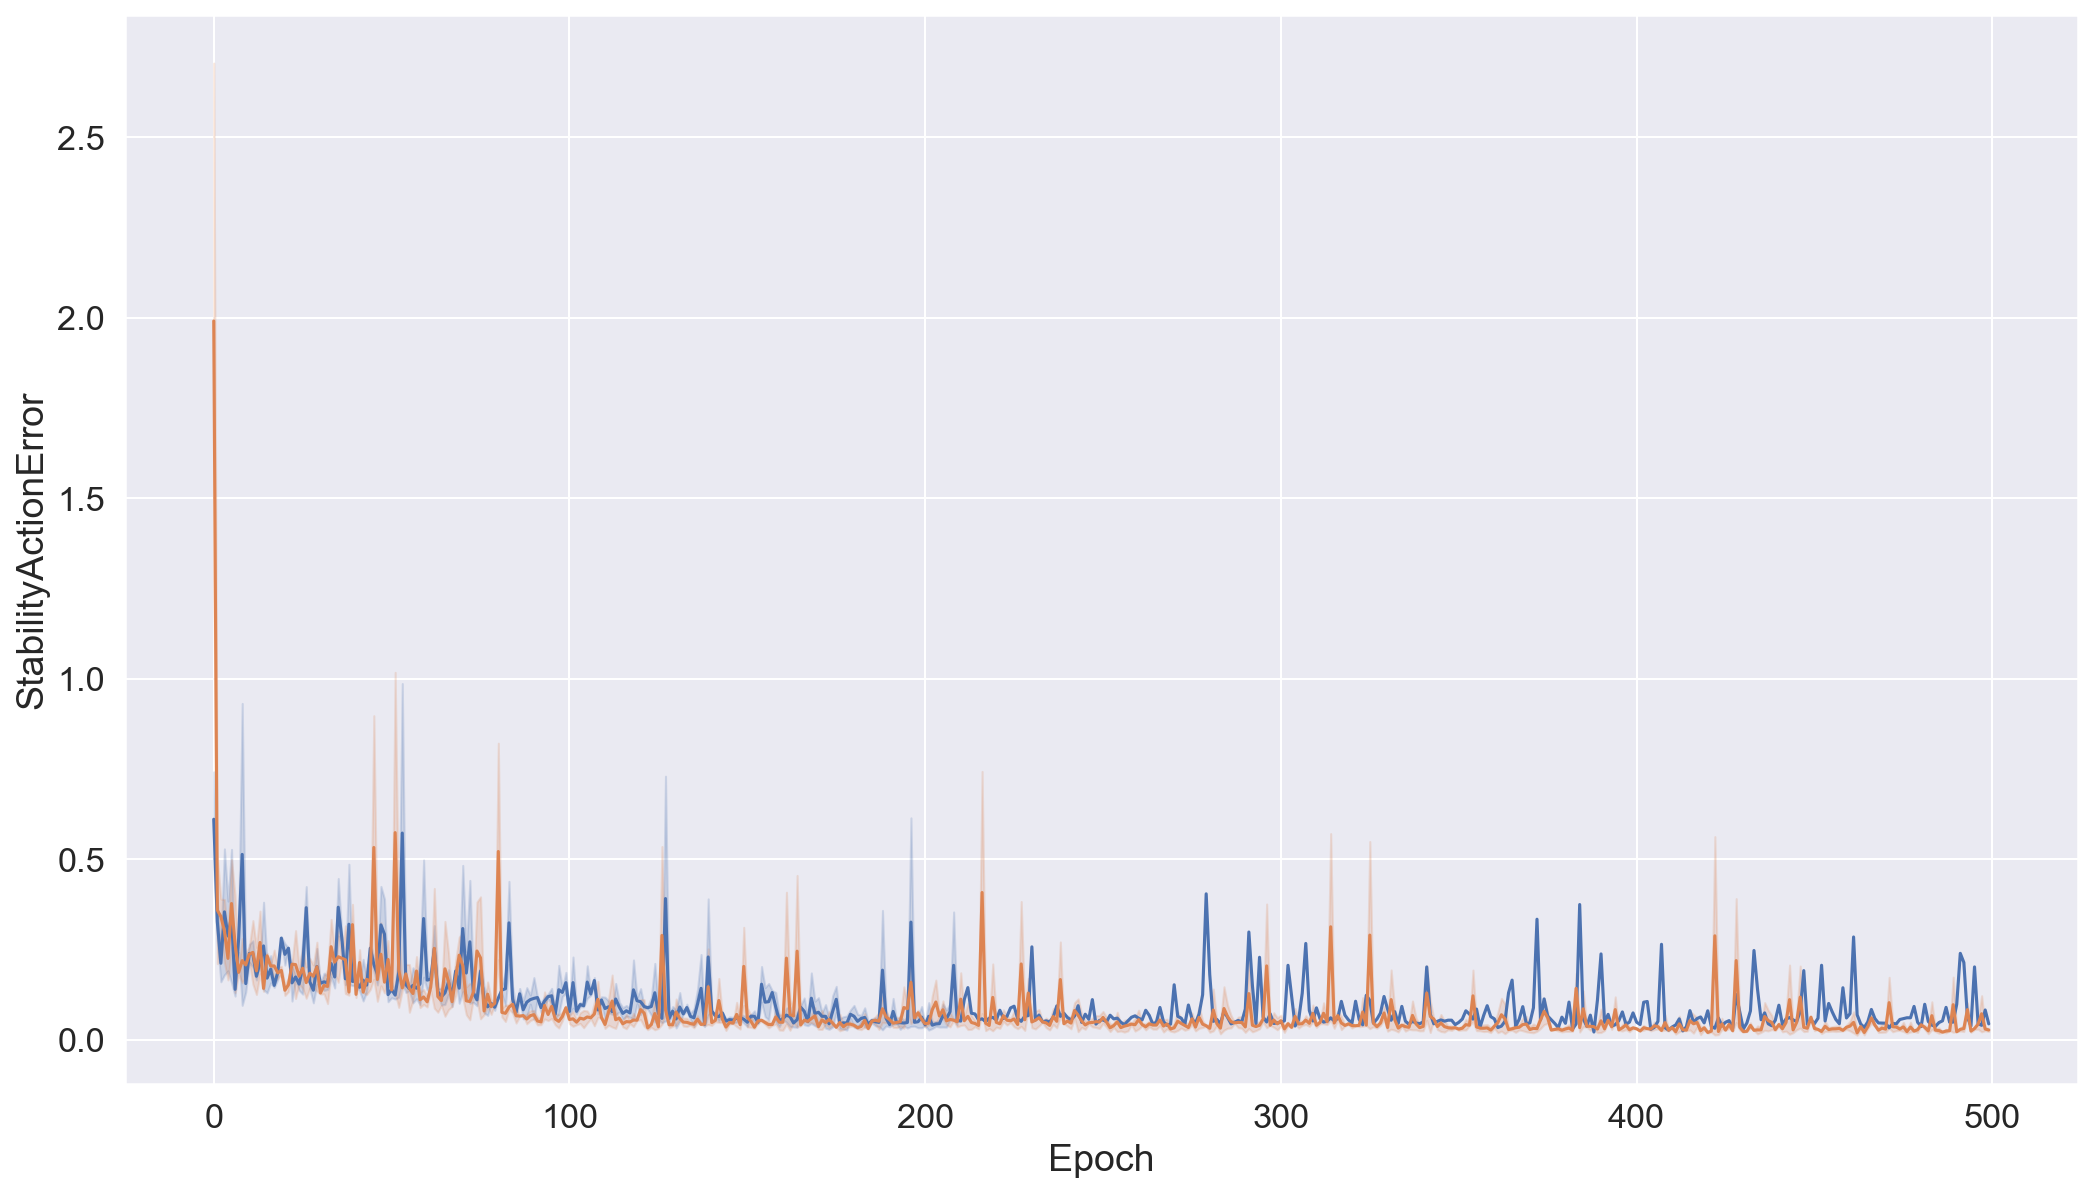

In [18]:
plt.figure(figsize=(14, 8), dpi=150)
plot_data(datasets, value='StabilityActionError', smooth=1, show_legend=False)
plt.show()

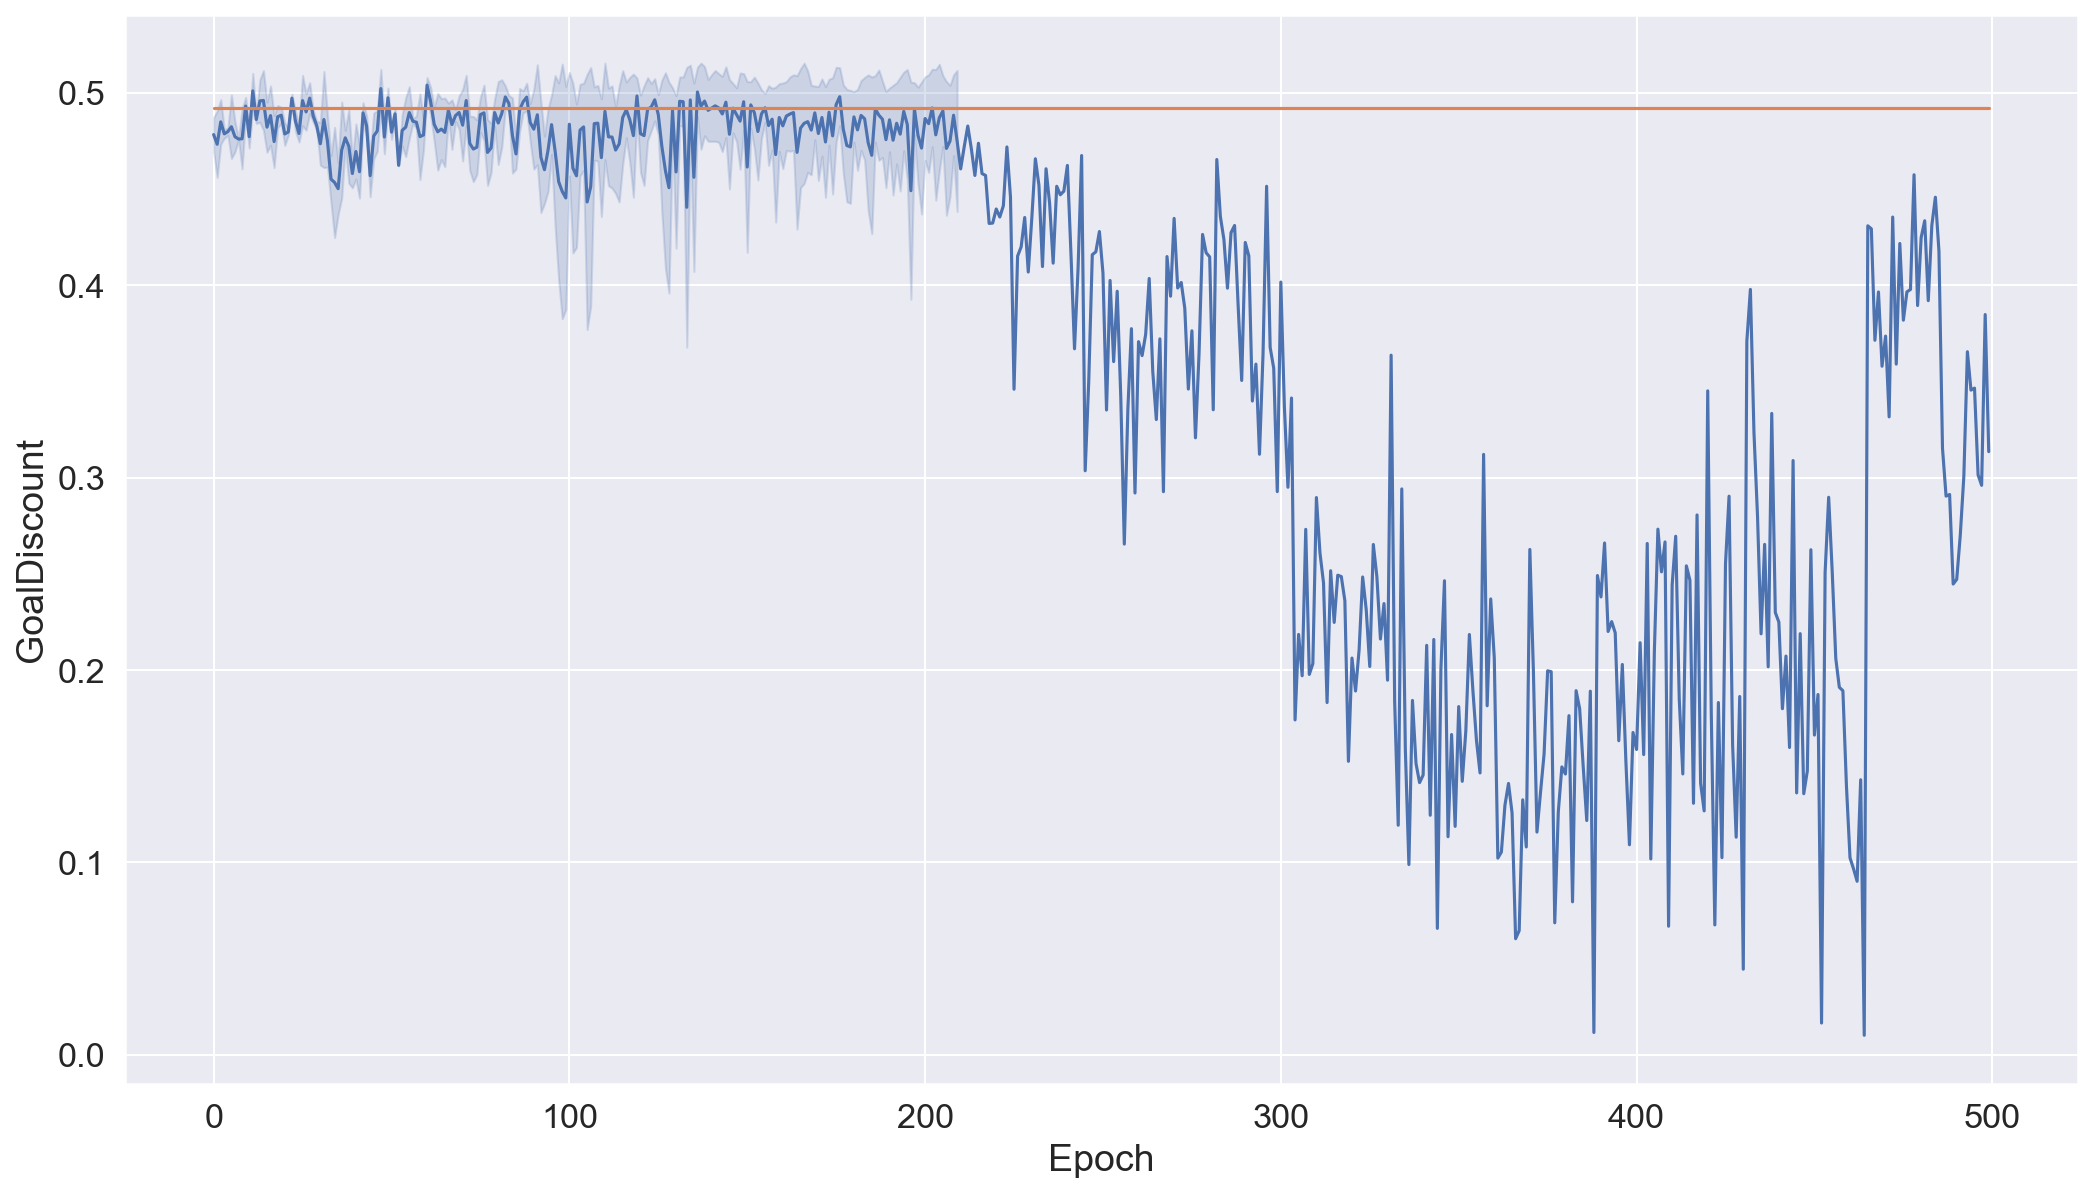

In [16]:
plt.figure(figsize=(14, 8), dpi=150)
plot_data(datasets, value='GoalDiscount', smooth=1, show_legend=False)
plt.show()

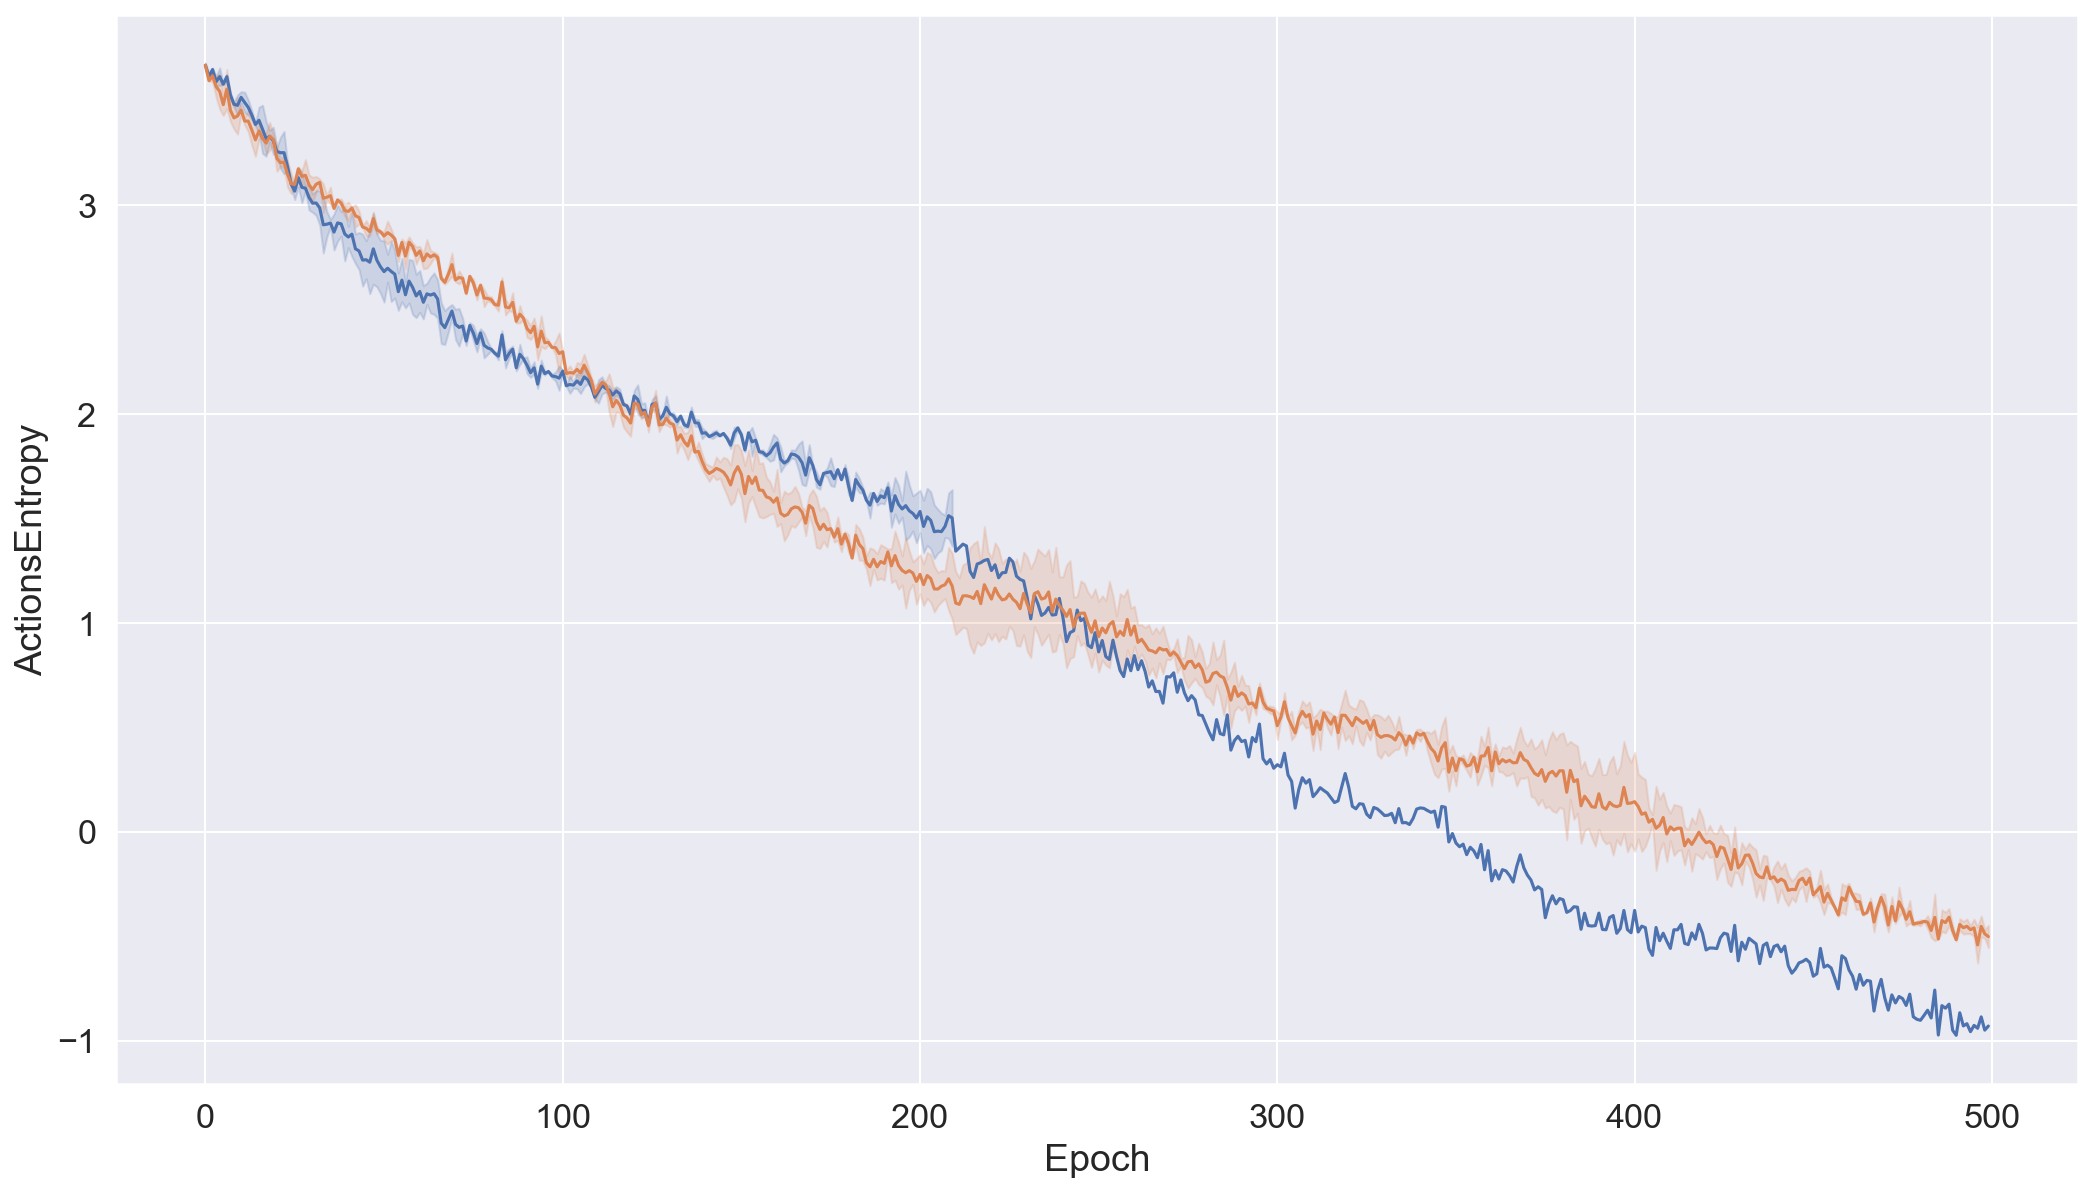

In [17]:
plt.figure(figsize=(14, 8), dpi=150)
plot_data(datasets, value='ActionsEntropy', smooth=1, show_legend=False)
plt.show()

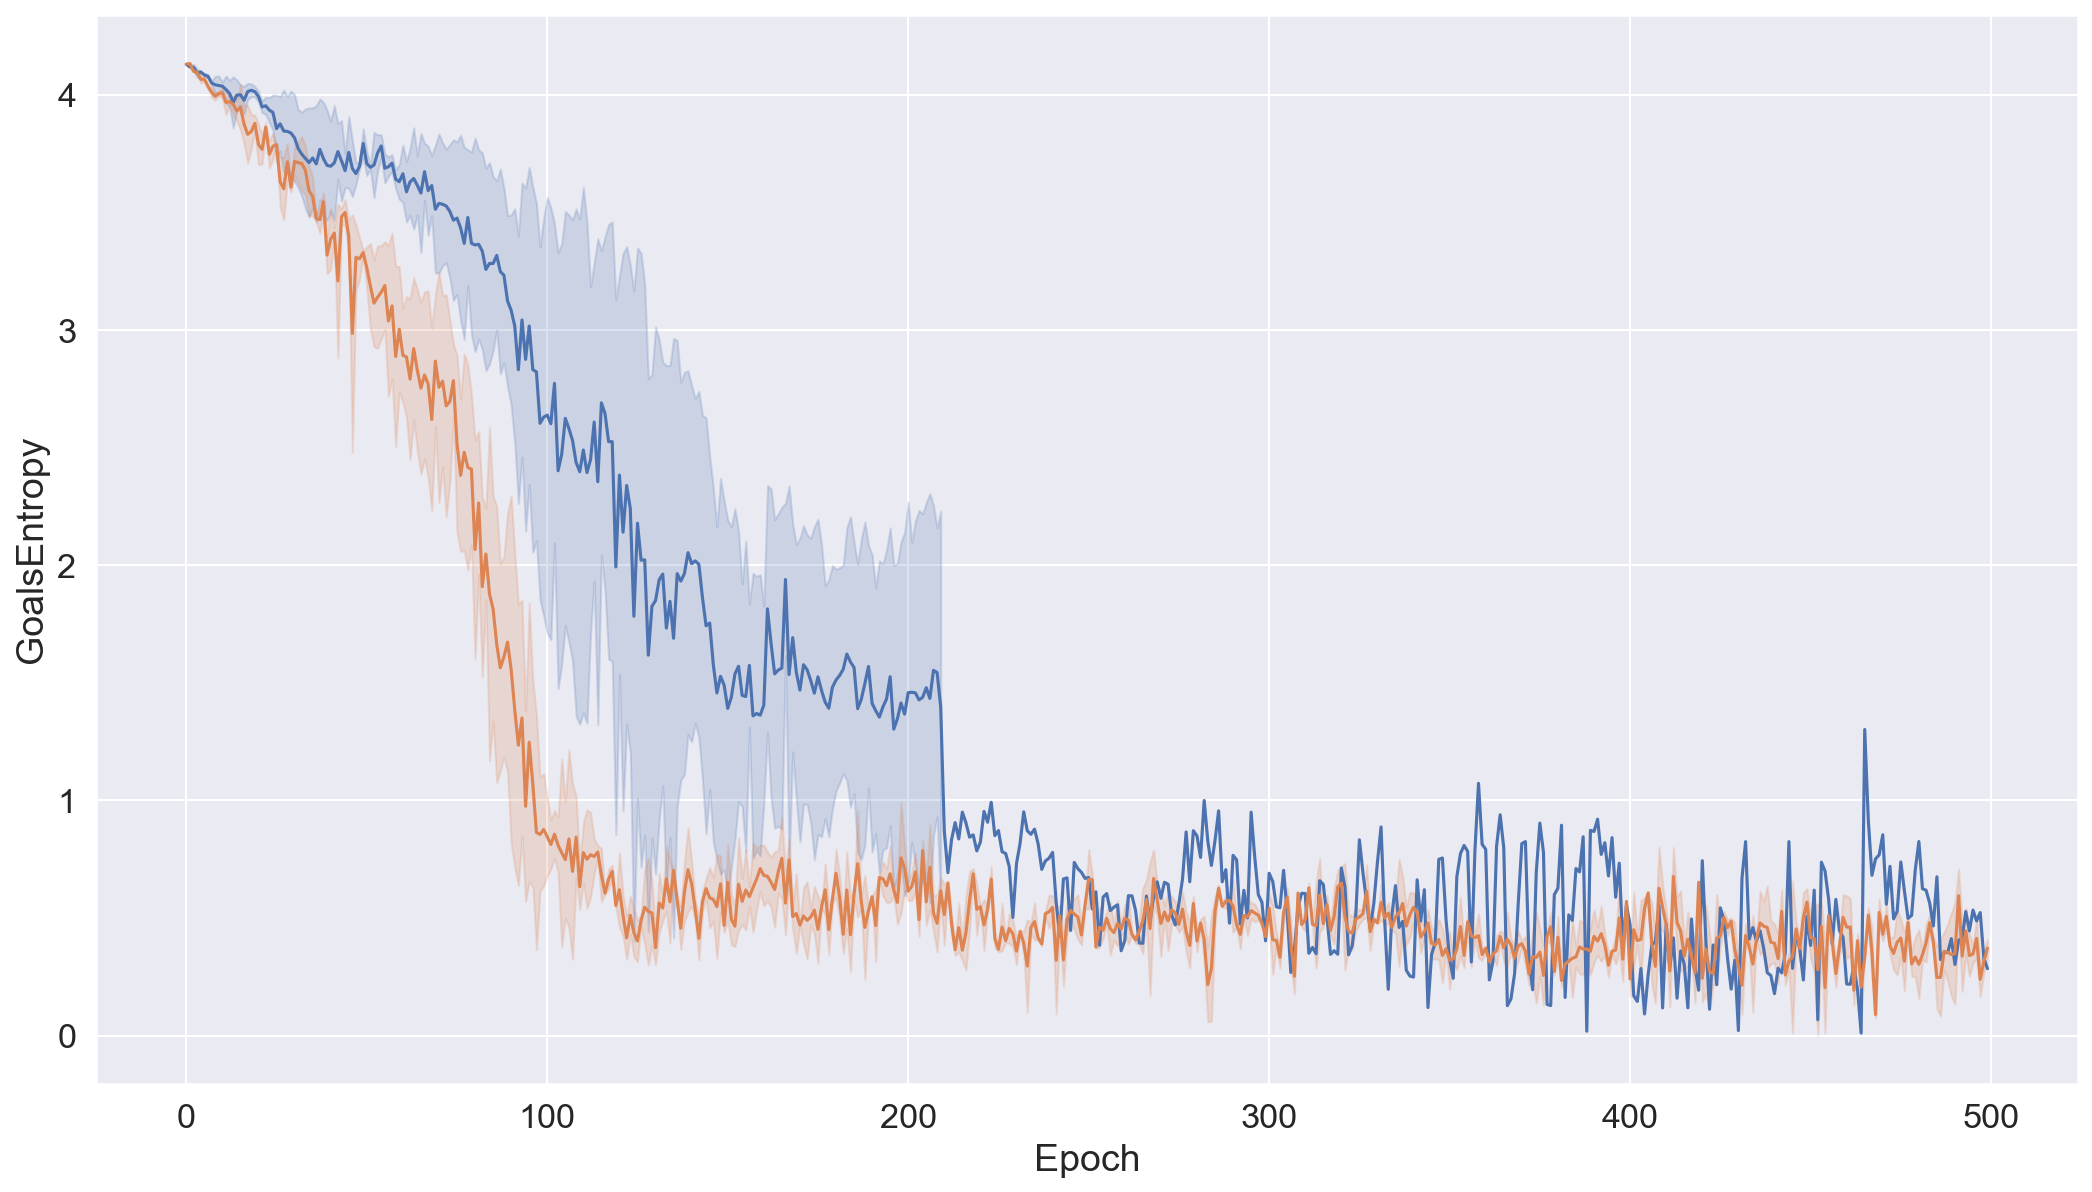

In [19]:
plt.figure(figsize=(14, 8), dpi=150)
plot_data(datasets, value='GoalsEntropy', smooth=1, show_legend=False)
plt.show()

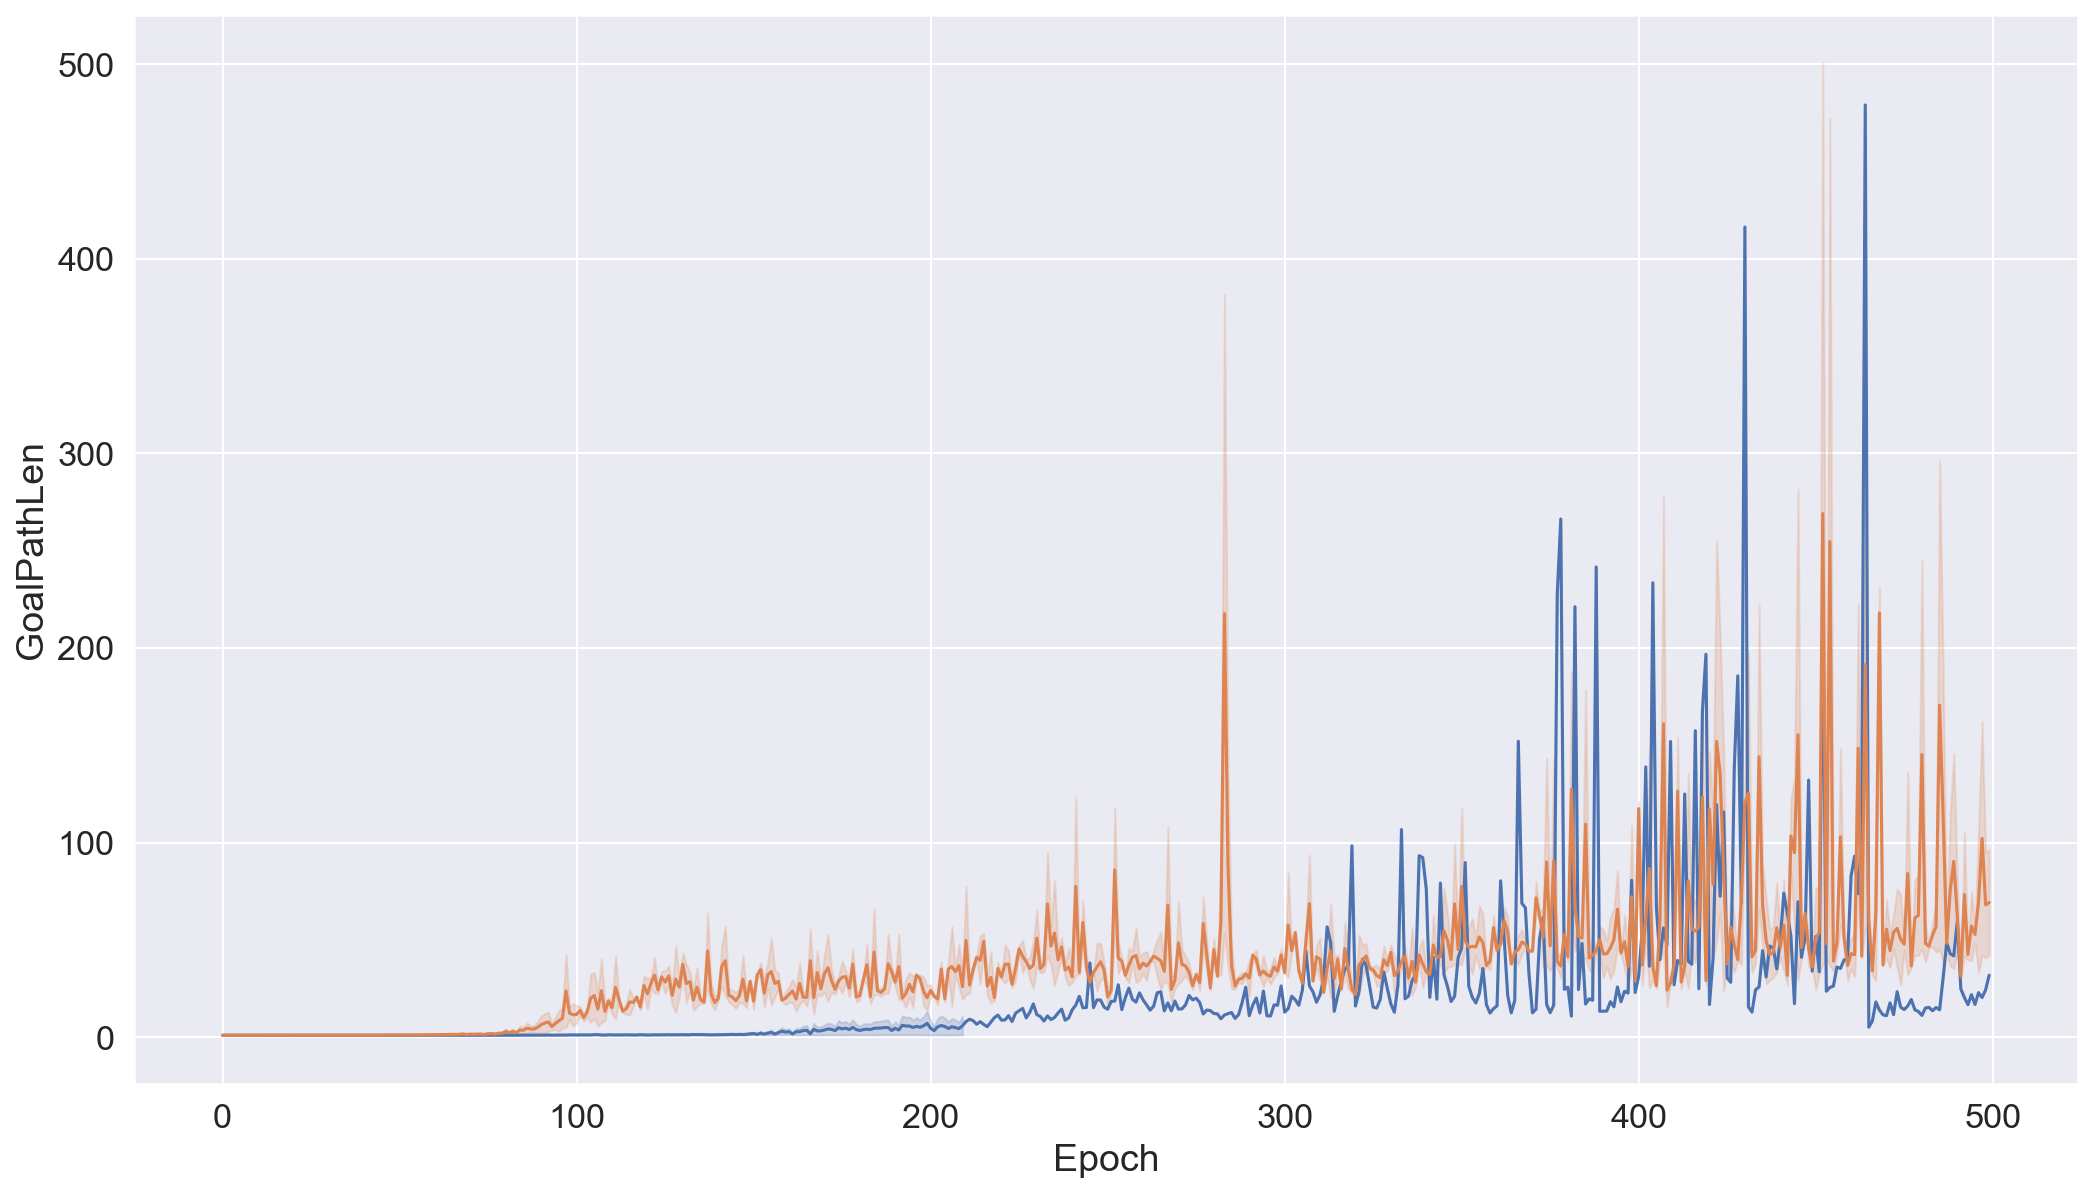

In [20]:
plt.figure(figsize=(14, 8), dpi=150)
plot_data(datasets, value='GoalPathLen', smooth=1, show_legend=False)
plt.show()